# Tutorial: Epidemiology Models


## Computational Economics  (ECO309)



H.W. Heathcote: epidemiologic models are *deterministic models for infectious diseases which are spread by direct person-to-person contact in a population*.

This kind of models has been used since by a few decades by economist, for matters that have nothing to do with health.

- diffusion of information, or opinions on social medias
- asset prices and fads
- expectation formation for macroeconomic outcomes (ex: *The Epidemiology of Macroeconomic Expectations* by Chris Carroll)

Epidemiologic models have two features that depart from standard economic models:

- Agent's behaviour does not take the full system into account, an is irrational in the sense that it isn't forwards looking. Instead, an agent is given a behavioural heuristic.
- The transitions of the whole system can be determined without solving for complex interactions first.

Understanding why these two assumptions are very costly for economists will keep us busy during a big part of the course. Here we just consider two simple models as small programming exercises.

### Simple SIR model

There is a continuum of agents of mass $1$. Each agent can be either "Susceptible" (S), "Infected" (I) or "Recovered" (R).
In each period, one agent meets another agent drawn randomly.
During a meeting Susceptible agents who meet an infected agent, will always catch the disease (or the fad) but are not contagious. Infected agents, have a probability $\pi$ of being recovered. Nothing happens to Recovered agents who meet other people. No distinction is made between recovering as a healthy or a dead person.

We're interested in the evolution in the number infected persons, both the speed of infection and the total amount of infected people in every period.

__Write down the transition equations for $n_I$, the number of infected people, for $n_R$ the number of recovered people and $n_S$ the number of susceptible people.__



We have 

$$\begin{aligned}
n_{S, t+1} &= n_{S, t} - \underbrace{n_{S, t} n_{I, t}}_{\textrm{newly infected}}\\
n_{I, t+1} &= (1-\pi) n_{I, t} + \underbrace{n_{S, t} n_{I, t}}_{\textrm{newly infected}} \\
n_{R, t+1} &= n_{R, t} + \pi n_{I, t}
\end{aligned}
$$

__Compute the transition function `f` for the vector state $s_t$ returning $s_{t+1}$__



In [57]:
s0 = [0.9, 0.1, 0.0]

3-element Vector{Float64}:
 0.9
 0.1
 0.0

In [72]:
function f(s; π=0.05)
    # n_S = s[1]*(1-s[2])
    # n_I = s[1]*s[2] - π*s[2]
    # n_R = s[3] + π*s[2]
    n_S = s[1] - s[1]s[2]
    n_I = (1-π)s[2] + s[1]s[2]
    n_R = s[3] + π*s[2]
    S = [n_S, n_I, n_R]
    return S
end

f (generic function with 1 method)

In [73]:
# sum(f(s0)), f(s0)
println("New S: $(f(s0)[1]), New I: $(f(s0)[2]), New R: $(f(s0)[3]), and S+I+R = $(sum(f(s0)))")

New S: 0.81, New I: 0.185, New R: 0.005000000000000001, and S+I+R = 1.0


__Compute the transitions over $T$ periods. Plot the result using Plots.jl. (bonus: check against closed form solution)__



In [74]:
# s0 = [0.9, 0.1, 0.01]
# s0 = [0.9, 0.06, 0.04]
simulations = []
for t in 1:50
    s1 = f(s0)
    push!(simulations, s1)
end

In [75]:
simulations

50-element Vector{Any}:
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 ⋮
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]
 [0.81, 0.185, 0.005000000000000001]

In [70]:
# import Pkg; Pkg.add("Plots")

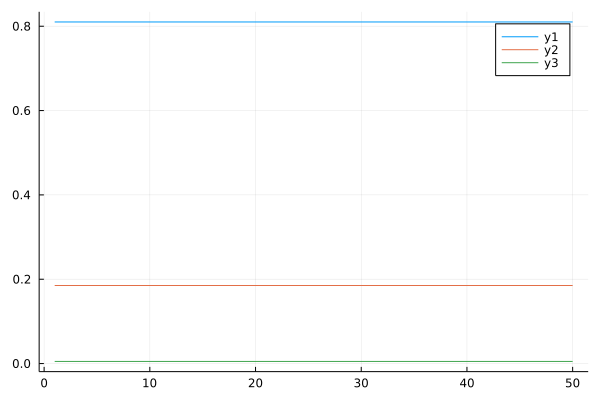

In [76]:
# Not sure why plotting doesn't work

using Plots
x = 1:50
susc = [e[1] for e in simulations]
inf = [e[2] for e in simulations]
rec = [e[3] for e in simulations]
plot(x, susc)
plot!(x, inf)
plot!(x, rec)

__We now assume a Susceptible person who meets an infected one has a probability $\mu$ of catching the disease. Update the transition function. Update function $f$ and write a function of $\mu$, $\pi$ which returns the simulation. Compare different values of the parameters. How would you interpret "social distancing"? How would you choose parameters $\Pi$ and $\mu$__ 

### A Spatial SIR model

We now consider another version of the model where agents evolve in the space $\mathcal{S}=[0,1]\times[0,1]$. There are $N\in\mathbb{N}$ agent. At any date, each agent $n \in [0,1]$  is located at $(x_n,y_n)\in \mathcal{S}$.

Each agent moves follows a random walk bounded by $\mathcal{S}$:
$$x_t = \min(\max( x_{t-1} + \epsilon_t, 0), 1)$$
$$y_t = \min(\max( y_{t-1} + \eta_t, 0), 1)$$
where $\epsilon_t$ and $\eta_t$ are both normally distributed with standard deviation $\sigma$.

At any date, the individual state of an agent is $s_t=(x_t, y_t, h_t)$ where $h_t$ is either "S", "I" or "R". $v_t$ denotes the states of all agents (for instance $v_t=(s_{n,t})_n$. The health status of each agent is updated in the following way:

- Agents $R$ stay $R$.
- Agents $I$ have probability $\pi$ to become $R$. They stay $I$ otherwise.
- An agent of type $S$ in position $(x,y)$ has a probability $prob(x,y,S)$ to be infected that is $\mu$ if there is another infected agent within a radius $r>0$.


__Define a type `Agent`, which holds the type of an agent. The state of the whole system will be held in a `Vector[Agent]` type.__



__Write a function `spatial_transition(S::Vector{Agent})::Vector{Agent}` to compute the transition of the positions. Write another function `random_guess(T=100)` which simulates for $T$ periods in order to find a good initial guess.__



__Write a function `show_population` to plot all agents with different colors for different health status.__



__Write a function `evolve(S::Vector[Agent])::Vector[Agent]` which takes the population in a given state and returns the same population with updated health status.__



__Write a function `simulate(S0::Vector[Agent], k=1)` to simulate the economy starting from an initially random position with `k` infected individuals. The returned object should be of type `Vector[Vector[Agent]]`.__



__Compute statistics along a simulated path for $n_I$, $n_S$, $n_R$. Plot and compare with the basic SIR model__

### Additional questions

Have fun by trying to answer one of these questions:
- change probability of infection so that it depends on the number of infected people in the vincinity (with some suitable functional formulation for)
- compute an animation of the transition
- compute an interactive visualisation (with `Interact.jl` if available)